<a href="https://colab.research.google.com/github/aryajpandey/Logistic_Regression/blob/master/Heart_attack_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [2]:
ht = pd.read_csv('/content/data.csv')
ht.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


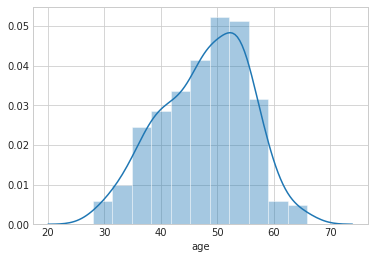

In [58]:
sns.distplot(df1['age'])

In [0]:
df = ht.replace('?', np.nan)

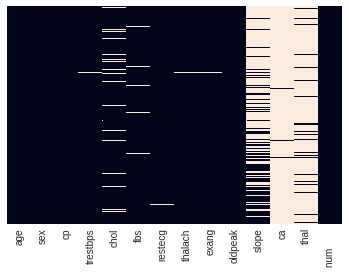

In [42]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='rocket')

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [0]:
df1 = df.drop(columns=['slope','ca','thal','restecg','exang' ])

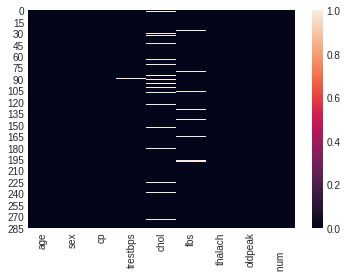

In [10]:
sns.heatmap(df1.isnull())

In [17]:
#data cleaning 
df1['chol'].dropna(how=any).mean()
#df1['trestbps'].unique()
#df1['restecg'] = df1['restecg'].dropna(how=any, axis=0)

250.84870848708488

In [0]:
df1['chol'] = df1['chol'].replace(np.nan, 251)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 9 columns):
age           294 non-null int64
sex           294 non-null int64
cp            294 non-null int64
trestbps      294 non-null float64
chol          271 non-null float64
fbs           286 non-null float64
thalach       294 non-null float64
oldpeak       294 non-null float64
num           294 non-null int64
dtypes: float64(5), int64(4)
memory usage: 20.8 KB


In [0]:
df1[['trestbps', 'chol', 'fbs','thalach']] = df1[['trestbps', 'chol', 'fbs','thalach']].apply(pd.to_numeric)

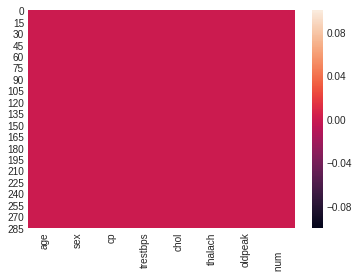

In [19]:
heart_attack = df1.drop(columns=['fbs'])
sns.heatmap(heart_attack.isnull())

In [20]:
heart_attack.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak',
       'num       '],
      dtype='object')

In [21]:
heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 8 columns):
age           294 non-null int64
sex           294 non-null int64
cp            294 non-null int64
trestbps      294 non-null float64
chol          294 non-null float64
thalach       294 non-null float64
oldpeak       294 non-null float64
num           294 non-null int64
dtypes: float64(4), int64(4)
memory usage: 18.5 KB


In [0]:
from sklearn.model_selection import train_test_split
X = heart_attack[['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y = heart_attack['num       ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [25]:
y_test

254    1
271    1
155    0
270    1
241    1
      ..
32     0
45     0
293    1
187    0
111    0
Name: num       , Length: 89, dtype: int64

In [0]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred = logmodel.predict(X_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        56
           1       0.75      0.64      0.69        33

    accuracy                           0.79        89
   macro avg       0.78      0.76      0.76        89
weighted avg       0.78      0.79      0.78        89



In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

In [39]:
cm

array([[49,  7],
       [12, 21]])